In [1]:
import numpy as np
import h5py
import pickle
import matplotlib.pyplot as plt

In [2]:
hdf5_file = h5py.File('/home/oliverkn/pro/real_data_test/test.hdf5', "r")
data = hdf5_file['data'].value
hdf5_file.close()
print(data.shape)

names = pickle.load(open('/home/oliverkn/pro/real_data_test/test.pkl', "rb"))
print(names)

(6462, 18)
['HT', 'nJets', 'nJets_b', 'lep_pt', 'lep_eta', 'lep_iso_ch', 'lep_iso_neu', 'lep_iso_gamma', 'MET', 'METo', 'METp', 'MT', 'n_mu', 'pt_mu', 'mass_mu', 'n_ele', 'pt_ele', 'mass_ele']


/home/oliverkn/pro/pycharm/venv/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


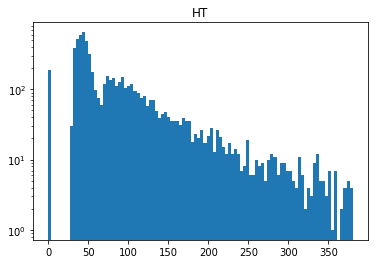

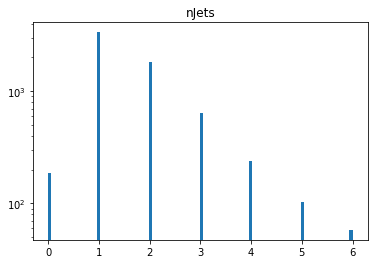

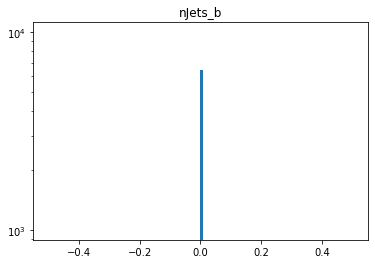

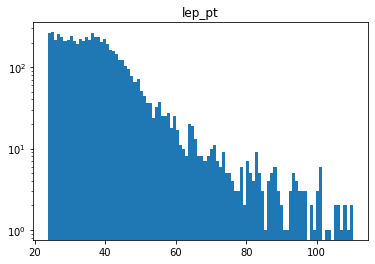

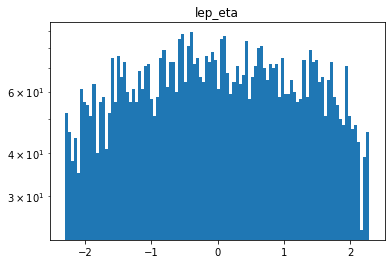

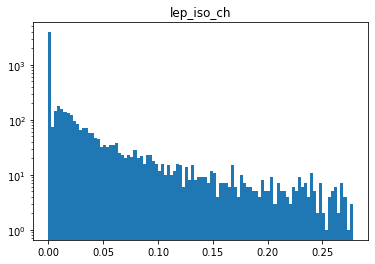

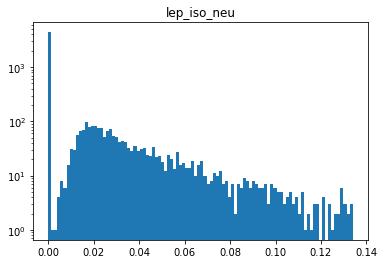

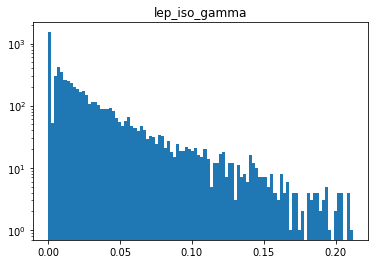

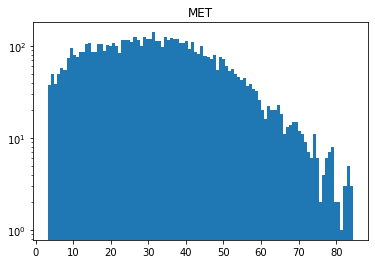

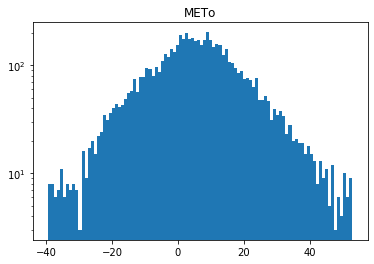

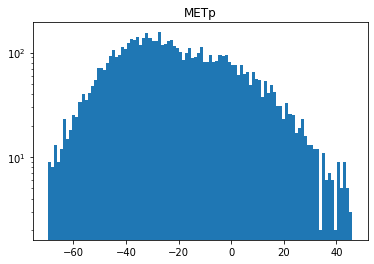

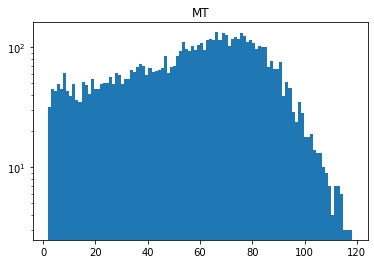

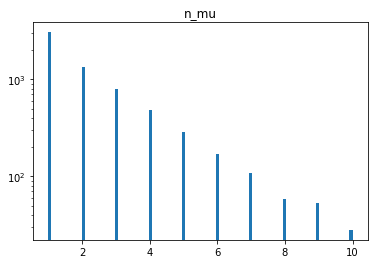

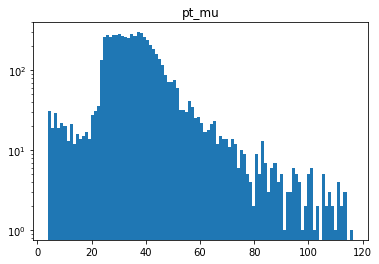

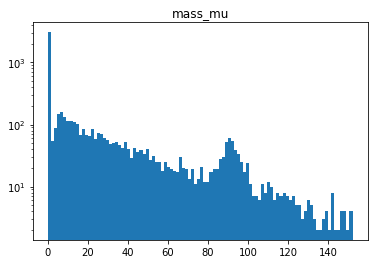

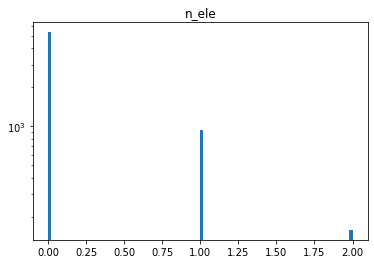

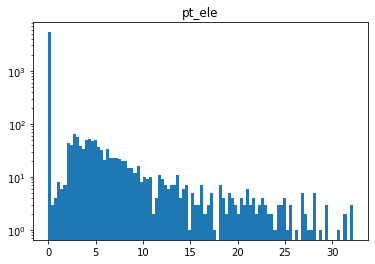

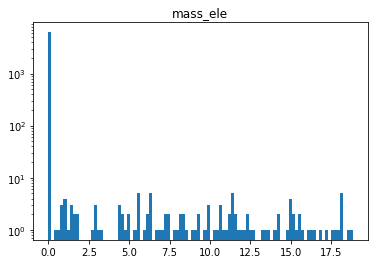

In [3]:
for i, name in enumerate(names):
    plt.figure()
    range = (np.quantile(data[:,i],0.01),np.quantile(data[:,i],0.99))
    plt.hist(data[:,i], bins=100,range=range)
    plt.title(name)
    plt.yscale('log', nonposy='clip')
plt.show()